In [1]:
from model import *
import matplotlib.pyplot as plt
import time

In [2]:
def get_negative_samples(model, call_back=0.5):
    """Get the negative samples from model for visualization

    Args:
        model (Net): the instance of Net
        call_back (float, optional): the call_back rate for positive sampling.

    Returns:
        negative: the negative plot set
    """
    # Calculate the prediction
    positive = []
    negative = []
    for x in np.linspace(-6,6,100):
        for y in np.linspace(-6,6,100):
            pos = [x,y]
            if model.forward(pos) > call_back:
                positive.append(pos)
            else:
                negative.append(pos)
    positive = np.array(positive)
    negative = np.array(negative)
    return negative

In [3]:
def visualize_boundary(model):
    """Visualize the boundary of the model

    Args:
        model (Net): the instance of Net
    """

    negative = get_negative_samples(model)
    
    plt.figure(figsize=(5,5))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.scatter(negative[:,0],negative[:,1],8,"black")
    plt.show()

In [4]:
def plot_error(model):
    """Plot the error log from model

    Args:
        model (Net): the instance of Net
    """
    logs = np.array(model.logs)
    plt.figure()
    plt.plot(logs[:,0],logs[:,1],label="train")
    plt.plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        plt.plot(logs[:,0],logs[:,3],label="test")
    plt.legend()
    plt.show()

In [5]:
net = Net(0.1)

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

net = train(net, train_data, 5000, test_data)

Early Stop  280 | T 0.1275 | V 0.1118:  10%|▉         | 480/5000 [00:27<04:22, 17.25epoch/s]


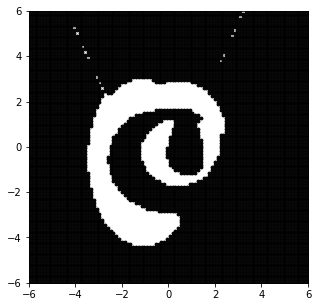

In [6]:
visualize_boundary(net)

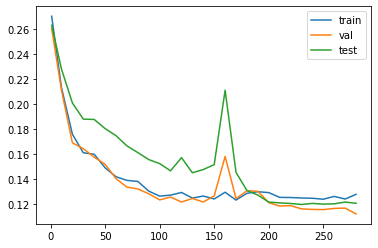

In [7]:
plot_error(net)

Epoch   70 | T 0.2065 | V 0.2051:   2%|▏         | 78/5000 [00:04<04:33, 18.00epoch/s]


KeyboardInterrupt: 

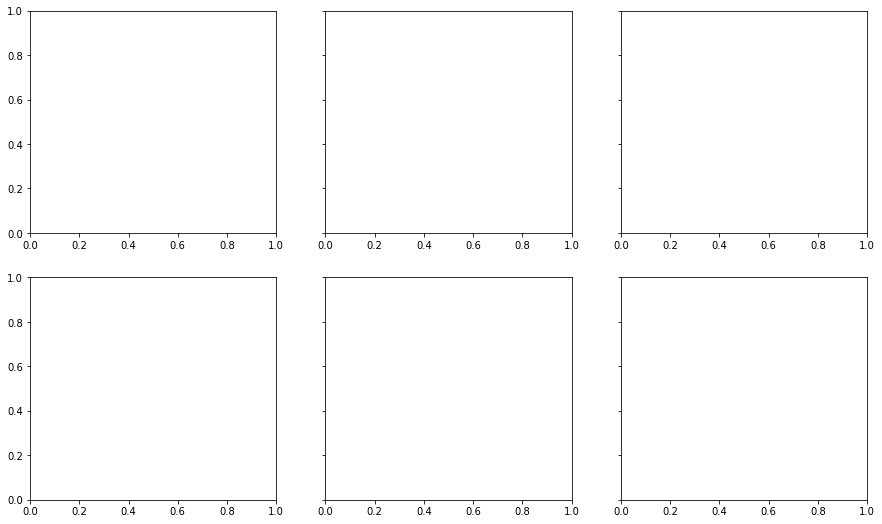

In [8]:
# benchmark

train_data = read_data("../two_spiral_train_data.txt")
test_data = read_data("../two_spiral_test_data.txt")

RANDOM_SEED = 201
EPOCH_THRESHOLD = 5000

fig, ax = plt.subplots(2, 3, sharey='row', figsize=(15,9))

for i, lr in enumerate([0.01, 0.05, 0.1]):
    # calcute the average training time.
    sum_time = 0.0
    for random_seed in [42, 58, 79, 131, 157]:
        net = Net(lr, 0.8, random_seed)
        start_time = time.time()
        train(net, train_data, EPOCH_THRESHOLD)
        elapsed_time = time.time() - start_time
        test_error = test(net, test_data)
        sum_time += elapsed_time

    # visualize decision boundaries at a given random seed.
    net = Net(lr, 0.8, RANDOM_SEED)
    start_time = time.time()
    net = train(net, train_data, EPOCH_THRESHOLD, test_data)
    elapsed_time = time.time() - start_time
    test_error = test(net, test_data)
    sum_time += elapsed_time
    sum_time /= 6
    print("Average time for lr=%.2f: %4ds" % (lr, sum_time))

    # visualize
    ax[0,i].set_title("lr=%.2f, test error: %.4f" % (lr, test_error))
    negative = get_negative_samples(net)
    ax[0,i].set_xlim(-6,6)
    ax[0,i].set_ylim(-6,6)
    ax[0,i].scatter(negative[:,0],negative[:,1],7,"black")

    # error
    logs = np.array(net.logs)
    ax[1,i].set_title("Epoch %4d @ %3d s" % (logs[-1][0], elapsed_time))
    ax[1,i].set_xlim(0,EPOCH_THRESHOLD)
    ax[1,i].plot(logs[:,0],logs[:,1],label="train")
    ax[1,i].plot(logs[:,0],logs[:,2],label="val")
    if len(logs[0]) > 3:
        ax[1,i].plot(logs[:,0],logs[:,3],label="test")
    ax[1,i].legend()

plt.savefig("../img/benchmark_lr.png")
plt.show()